# About the Dataset

## Context
The two datasets provided are related to red and white variants of the Portuguese "Vinho Verde" wine. The datasets were originally introduced by Cortez et al. in 2009. Due to privacy and logistic constraints, only physicochemical (inputs) and sensory (output) variables are included, with no information about grape types, wine brand, or selling price.

These datasets can be utilized for classification or regression tasks. It's important to note that the classes are ordered and not balanced; for example, there are significantly more normal wines than excellent or poor ones.

The dataset is also available from the UCI Machine Learning Repository. I have shared it on Kaggle for convenience, but I will remove it if requested due to any potential licensing restrictions.

## Content
For more detailed information, refer to the paper by Cortez et al. (2009).

### Input Variables (Physicochemical Tests):
1. Fixed acidity
2. Volatile acidity
3. Citric acid
4. Residual sugar
5. Chlorides
6. Free sulfur dioxide
7. Total sulfur dioxide
8. Density
9. pH
10. Sulphates
11. Alcohol

### Output Variable (Sensory Data):
12. Qualit (score between 0 and 10)


In [3]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("winequality-red.csv")
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [7]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

#### Note:
The output which is quality is on a scale of 3-8 so I would like to tackle this business problem as a classification task. Spliting the quality into 3 classes low,medium and high quality wine. 

Encoding quality. 

In [9]:
bins = [0,4,6,10]
labels = ['low','medium','high']

df['quality'] = pd.cut(df['quality'],bins=bins,labels=labels,include_lowest = True)
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol quality  
0      9.4  medium  
1      9.8  medium  
2      9.8  medium  
3      9.8  medium  
4      9.4  medium

#### Exploration
- Checking for missing data and duplicates.
     - If any handling them. 
- Story about the dataset.
     - Visulizations

##### Missing/Duplicates 

In [14]:
def missing_duplicate(df):
    missing = df.isnull().sum().sum()
    duplicates = df.duplicated().sum()
    if missing >= 1 or duplicates >= 1:
        return f'Number of missing data: {missing} and duplicates: {duplicates}'
    else:
        return f'No missing/duplicate data'

In [15]:
missing_duplicate(df)

'Number of missing data: 0 and duplicates: 240'

#### Notes
No missing data but we have duplicates. In an industry setting to handle the duplicates first we have to remove them and then see if we can gather more data but that is usually not the case. 

##### Handling duplicates industry style.
- Drop them.
- See if it possible to gather more data.
- Look at __Handling duplicates__ notebook

But in this case i will be droping this duplicates. 

In [19]:
df_new = df.drop_duplicates(keep="first")
df_new.shape, df.shape

((1359, 12), (1599, 12))

In [25]:
percentage_loss = (df_new.shape[0]/df.shape[0])*100
print(f'The percentage lost from dropping duplicates {round(100 - percentage_loss,2)}%')

The percentage lost from dropping duplicates 15.01%


Keeping roughly 85% plus of our data is still very good to go... 

##### Story telling.
- Findings about each variable. 
- correlation.
- Each variable compared to target variable.
- Distribution of each feature.

**Univariate Analysis:**

- **Histograms:** We can create histograms for each numerical feature (fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol).

- **Box plots:** Similarly, we can generate box plots for each numerical feature to identify the presence of outliers.

- **Count plots:** For the categorical feature 'quality', we can create a count plot to see the distribution of wine quality ratings.

- **Density plots:** Density plots can be generated for each numerical feature to visualize the probability density.

**Questions to Ask:**

1. **What is the range of values for each feature?**
   - We can examine the minimum and maximum values for each numerical feature to understand the range of values it covers.

2. **Are there any outliers in the data for each feature?**
   - By analyzing box plots or scatter plots, we can identify any data points that fall significantly outside the main distribution, indicating potential outliers.

3. **Do the features appear normally distributed?**
   - Density plots or kernel density estimation (KDE) plots can help us assess whether the distribution of each numerical feature resembles a normal distribution.

4. **Are there any clear patterns or trends in the distribution of each feature?**
   - We can explore whether certain features exhibit distinct patterns or trends across different wine quality ratings. For example, does fixed acidity tend to be higher for lower quality wines? This can be visualized using box plots grouped by quality ratnship between features and quality ratings.


C:\Users\mayuo\AppData\Local\Temp\ipykernel_29092\1343676585.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="quality", data=df, palette=palette[2:])  # Use remaining colors
C:\Users\mayuo\AppData\Local\Temp\ipykernel_29092\1343676585.py:53: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.countplot(x="quality", data=df, palette=palette[2:])  # Use remaining colors


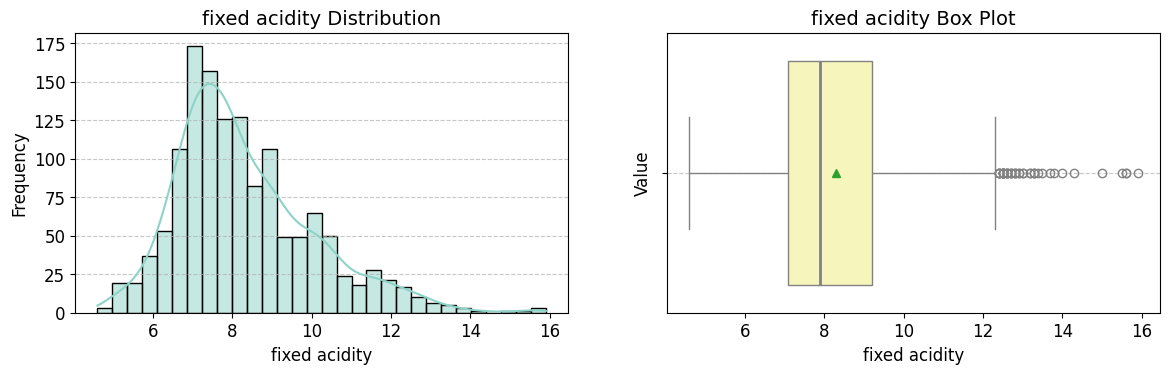

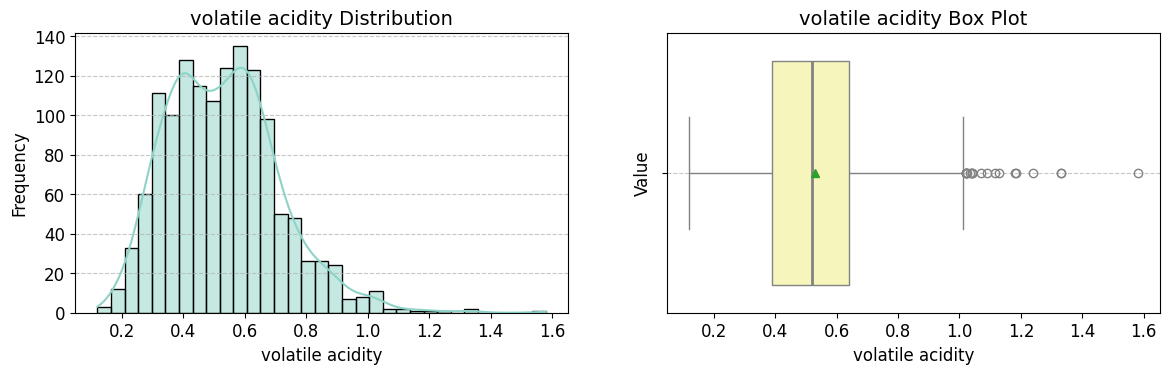

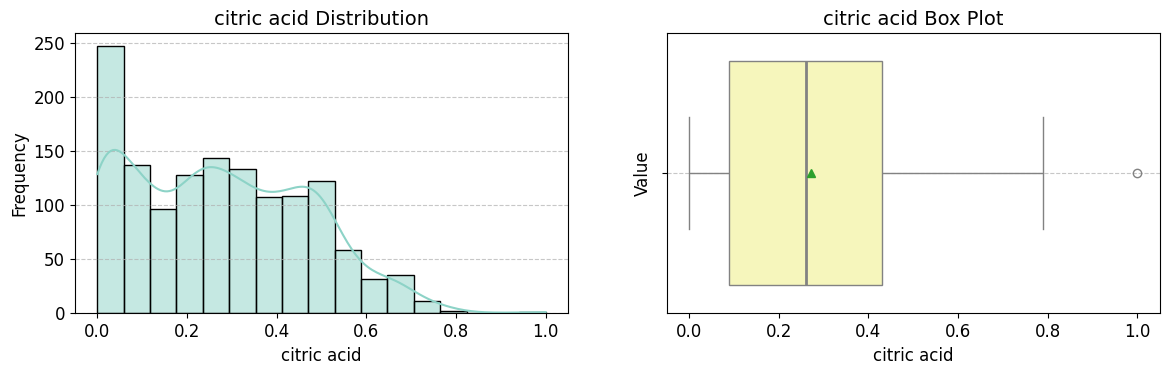

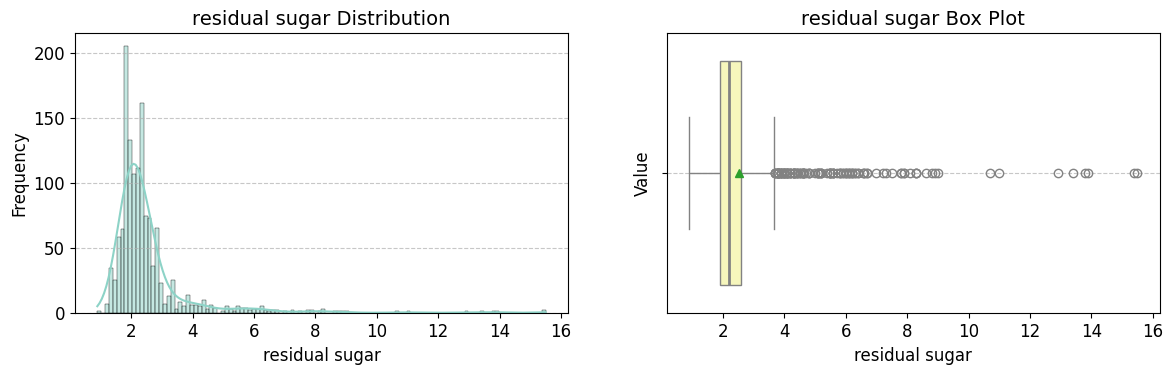

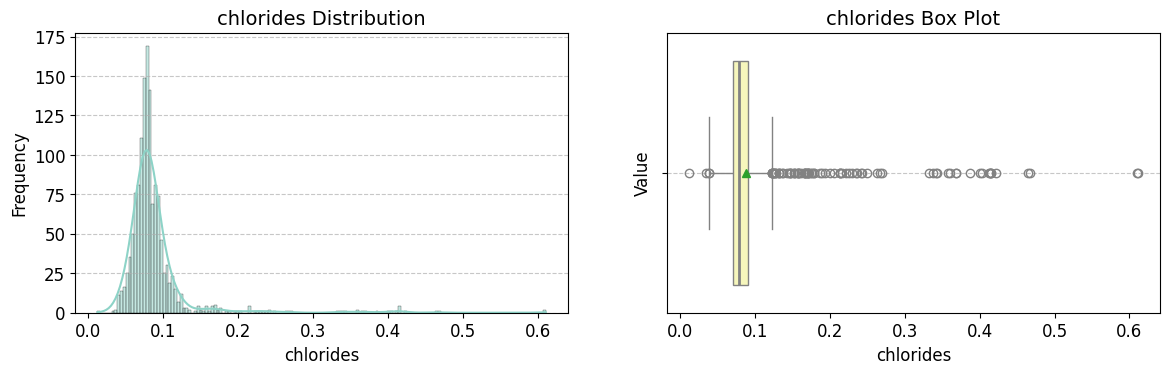

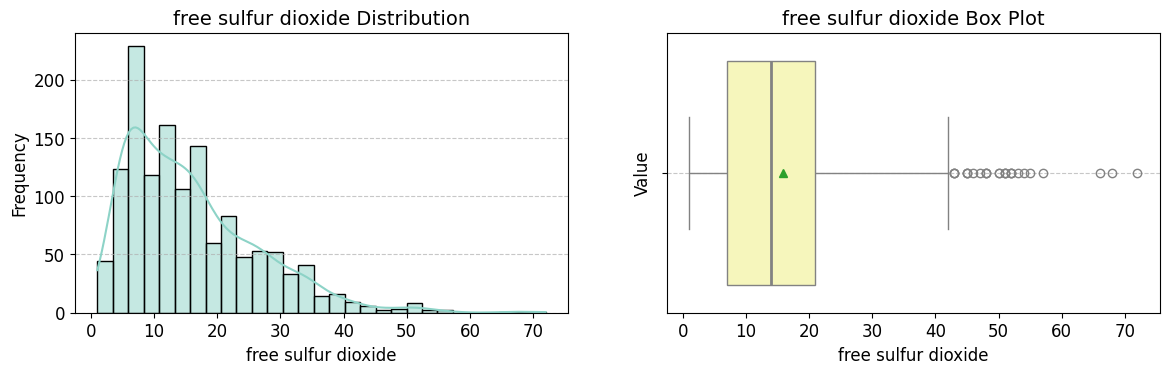

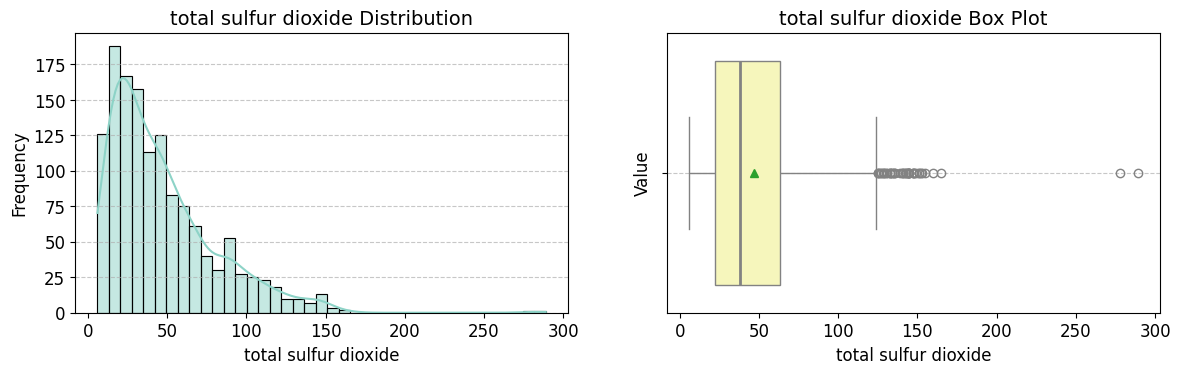

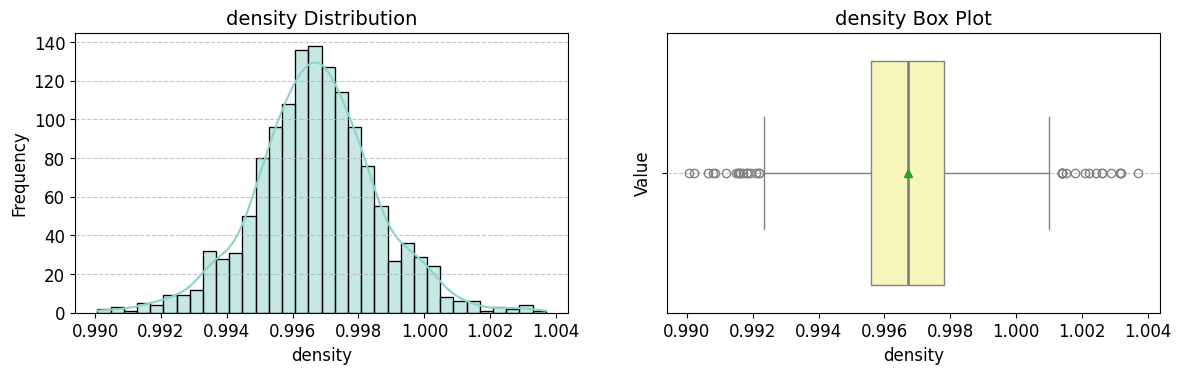

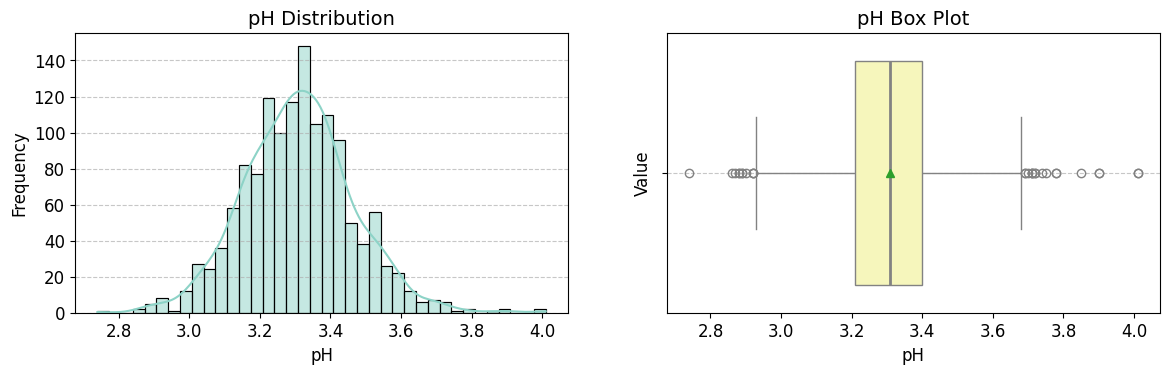

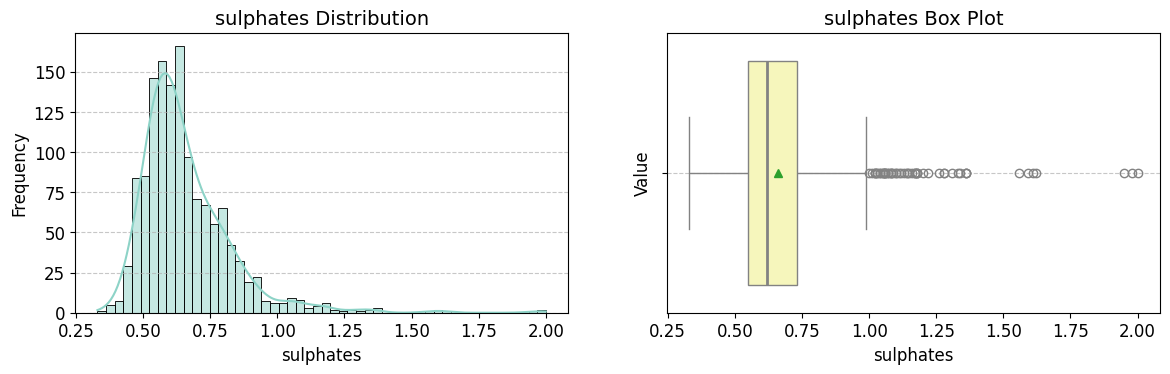

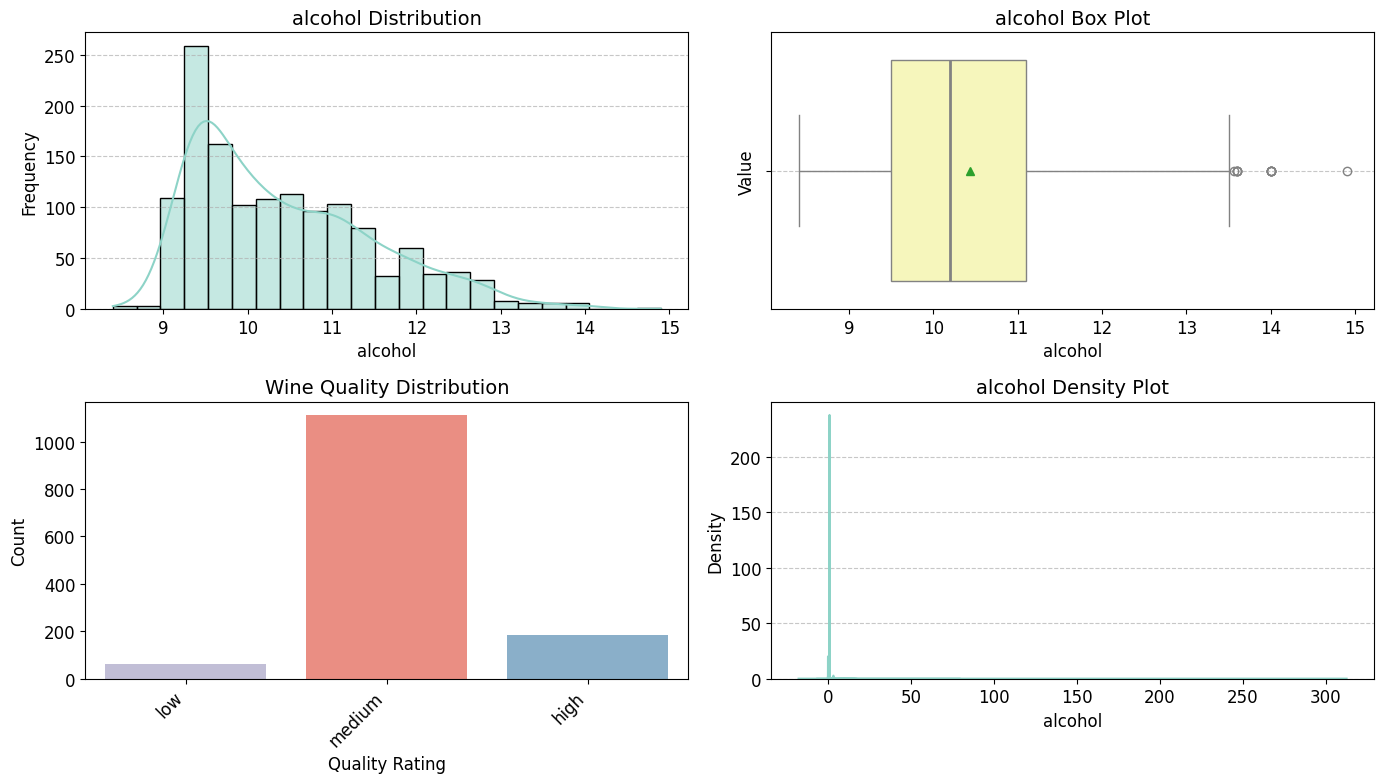

In [30]:
def univariate_analysis(df, color_palette="Set3"):
  """
  This function performs univariate analysis on a DataFrame with a more aesthetically pleasing layout.

  Args:
      df (pandas.DataFrame): The DataFrame containing the data.
      color_palette (str, optional): The seaborn color palette to use for visualizations. Defaults to "Set3".

  Returns:
      None
  """
  # Set default font size for consistency
  plt.rcParams["font.size"] = 12

  # Access the actual colors from the chosen palette
  try:
      palette = sns.color_palette(color_palette)
  except ValueError:
      print(f"Invalid color palette name: {color_palette}. Using default 'Blues' palette.")
      palette = sns.color_palette("Blues")  # Default fallback palette

  # Loop through numerical features (excluding 'quality')
  for col in df.select_dtypes(include=[np.number])[:-1]:
    plt.figure(figsize=(14, 8))  # Adjust figure size as needed

    # Histogram with color customization
    plt.subplot(221)
    sns.histplot(
        data=df, x=col, color=palette[0], edgecolor="black", kde=True
    )
    plt.title(f"{col} Distribution", fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.grid(axis="y", linestyle="--", alpha=0.7)  # Add subtle gridlines

    # Box Plot with color customization
    plt.subplot(222)
    sns.boxplot(
        x=col,
        y=None,
        showmeans=True,
        data=df,
        color=palette[1],
        medianprops={"linewidth": 2},
    )
    plt.title(f"{col} Box Plot", fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel("Value", fontsize=12)
    plt.grid(axis="y", linestyle="--", alpha=0.7)  # Add subtle gridlines

  # Count Plot for quality (assuming 'quality' is categorical)
  plt.subplot(223)
  sns.countplot(x="quality", data=df, palette=palette[2:])  # Use remaining colors
  plt.title("Wine Quality Distribution", fontsize=14)
  plt.xlabel("Quality Rating", fontsize=12)
  plt.ylabel("Count", fontsize=12)
  plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability

  # Density Plot (optional)
  for col in df.select_dtypes(include=[np.number])[:-1]:
    plt.subplot(224)
    sns.kdeplot(df[col], color=palette[0])  # Use first color again
    plt.title(f"{col} Density Plot", fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel("Density", fontsize=12)
    plt.grid(axis="y", linestyle="--", alpha=0.7)  # Add subtle gridlines

  plt.tight_layout()  # Adjust spacing between subplots for better readability
  plt.show()


# Example usage (assuming your data is in a DataFrame named 'df')
univariate_analysis(df_new)

**Bivariate Analysis:**

- **Scatter plots:** We can create scatter plots to explore relationships between pairs of numerical features. For example, scatter plots of fixed acidity vs. volatile acidity, alcohol vs. quality, etc.

- **Correlation matrix:** Calculate the correlation coefficients between all pairs of numerical features and visualize them in a heatmap. This will help identify strong correlations between features.

- **Box plots grouped by categories:** We can create box plots of numerical features grouped by the categorical feature 'quality' to see how feature distributions vary across different wine quality ratings.

- **Violin plots:** Violin plots can be used to compare the distribution of numerical features across different categories.

**Questions to Ask:**

1. **Is there a correlation between two features (positive, negative, or no correlation)?**
   - Scatter plots can help us visualize the relationship between pairs of numerical features and assess whether there is a positive, negative, or no correlation between them.

2. **How does one feature change with respect to quality?**
   - Colored box plots or violin plots can be used to examine how a numerical feature varies across different quality ratings. This allows us to see if there are any trends or patterns in feature values as wine quality changes.

3. **Are there any outliers that might be affecting the relationship between features or features and quality?**
   - By identifying outliers through box plots, scatter plots, or other visualization techniques, we can determine if they are influencing the relationship between features or the relationship between features and quality ratings.


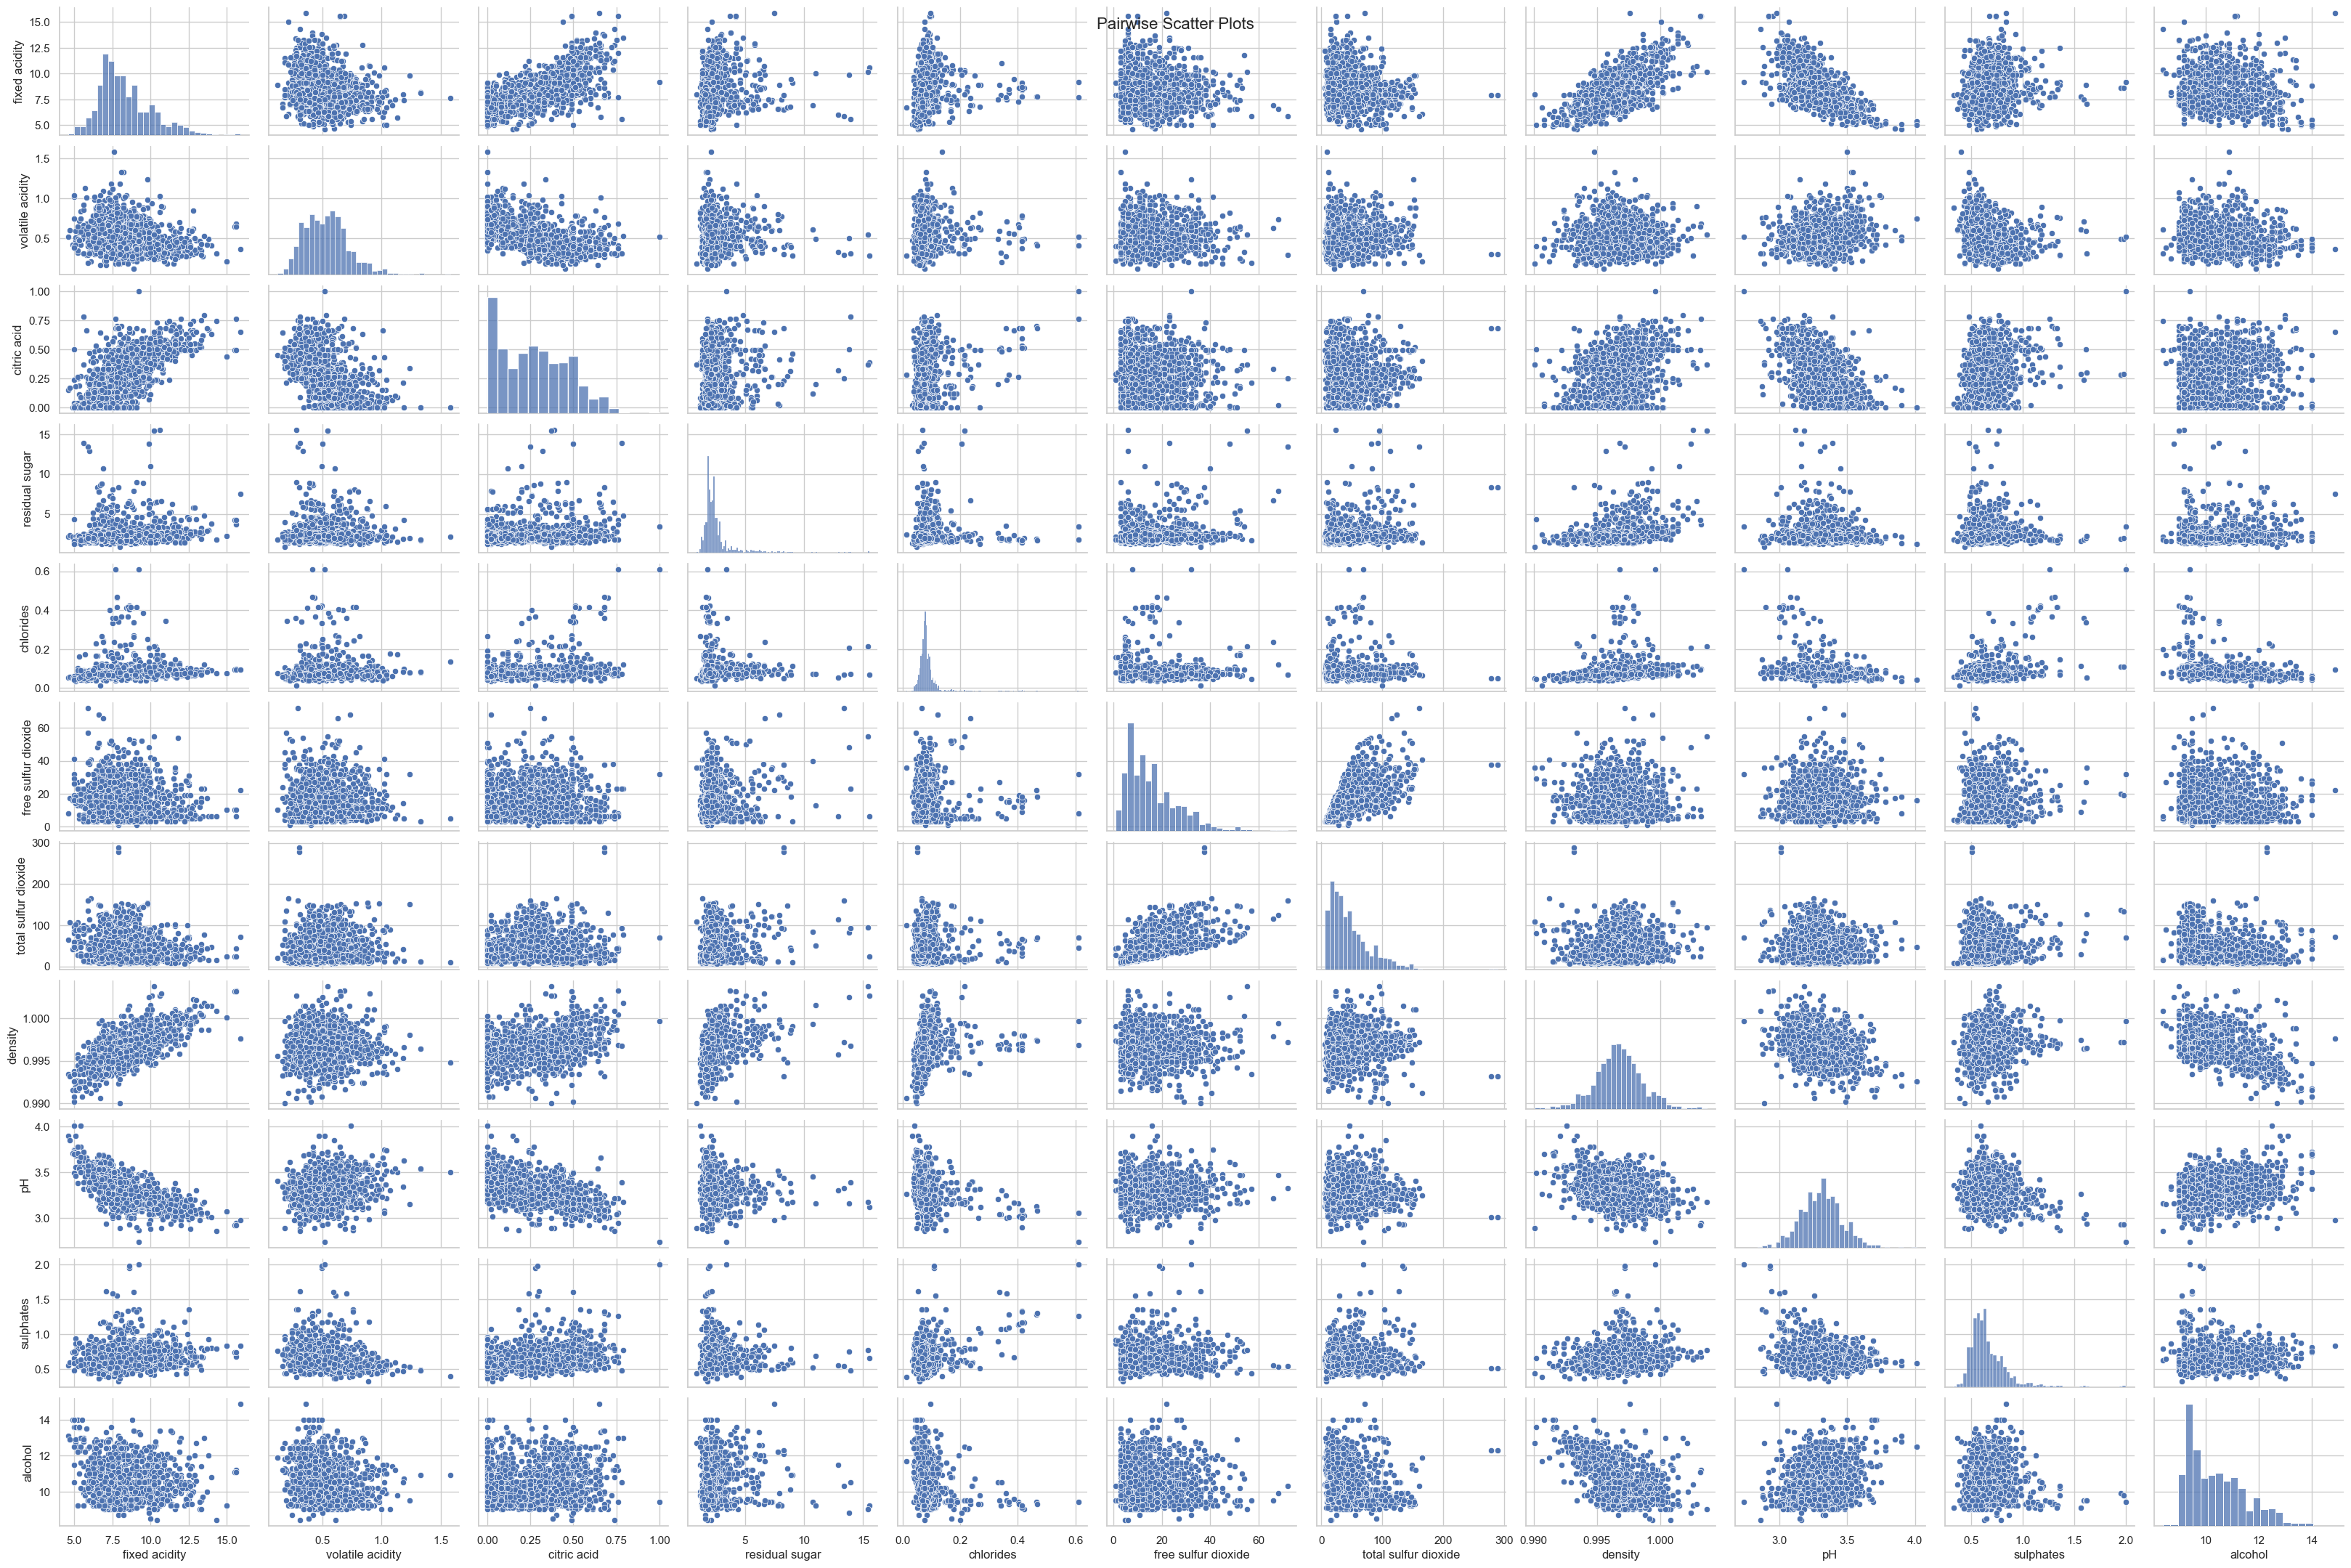

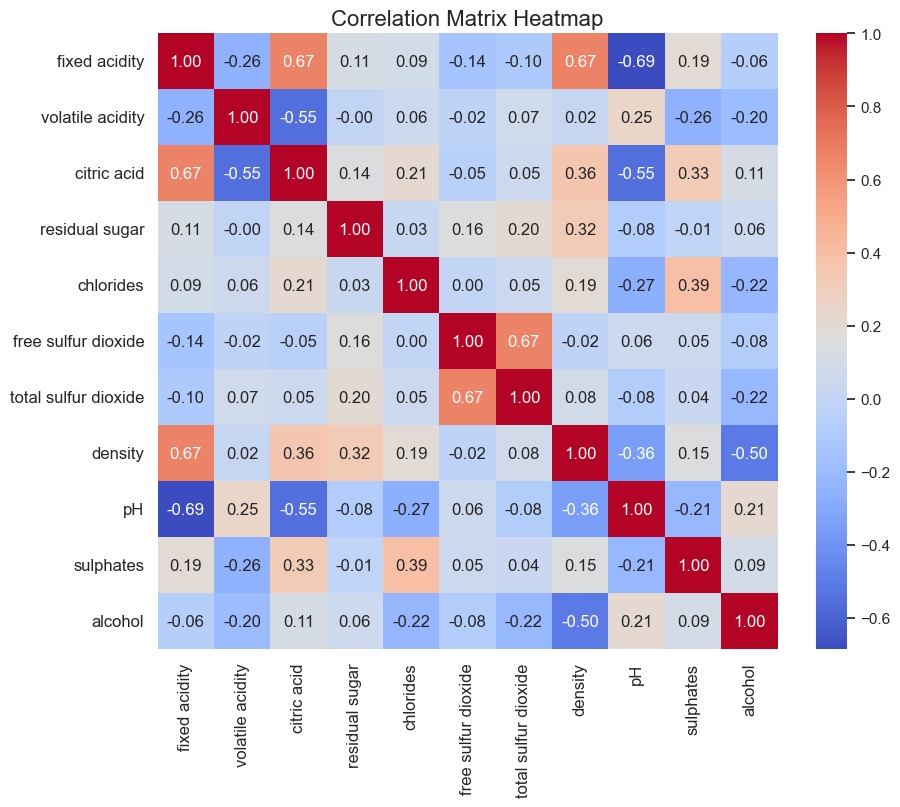

C:\Users\mayuo\AppData\Local\Temp\ipykernel_29092\1311032678.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality', y=col, data=df, palette="Set3")


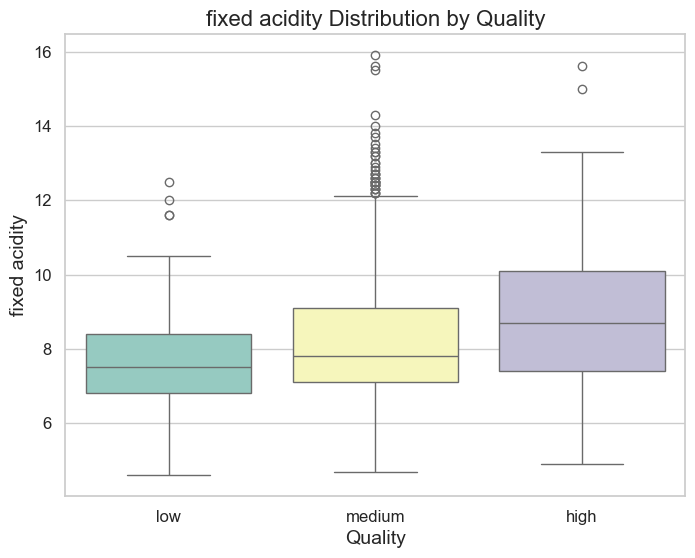

C:\Users\mayuo\AppData\Local\Temp\ipykernel_29092\1311032678.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality', y=col, data=df, palette="Set3")


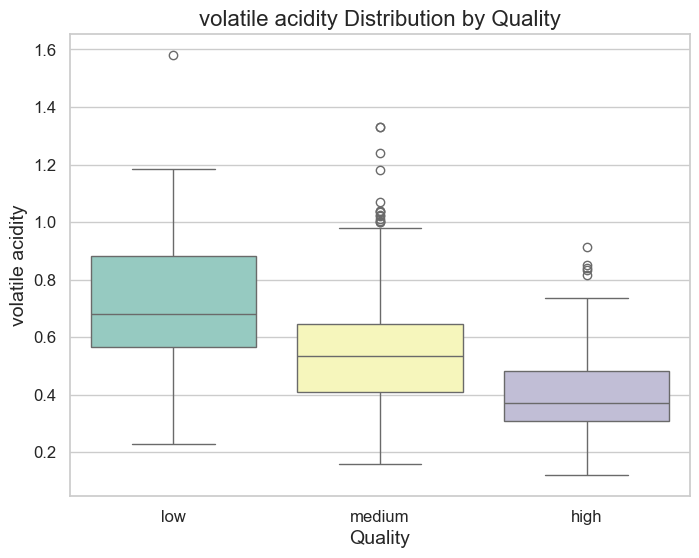

C:\Users\mayuo\AppData\Local\Temp\ipykernel_29092\1311032678.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality', y=col, data=df, palette="Set3")


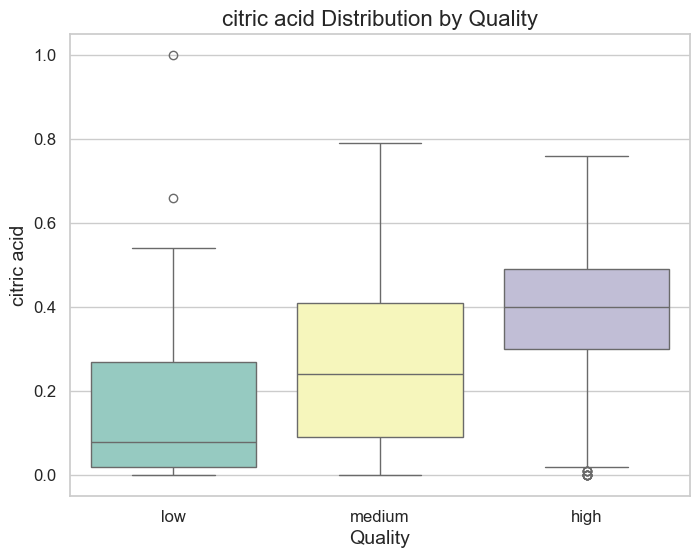

C:\Users\mayuo\AppData\Local\Temp\ipykernel_29092\1311032678.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality', y=col, data=df, palette="Set3")


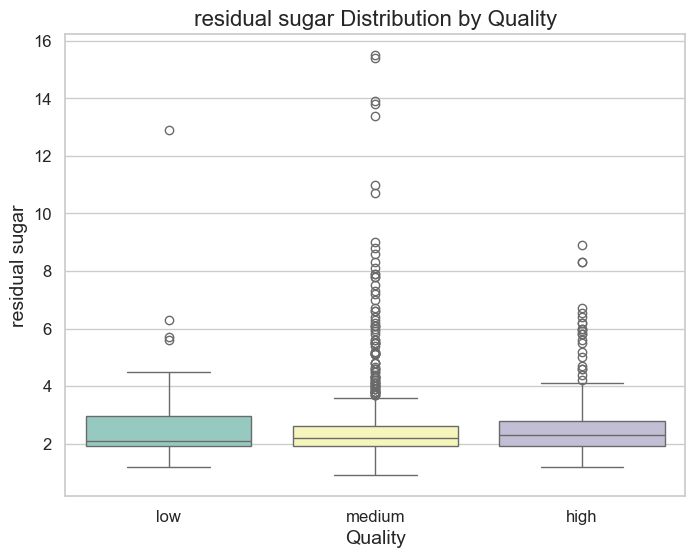

C:\Users\mayuo\AppData\Local\Temp\ipykernel_29092\1311032678.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality', y=col, data=df, palette="Set3")


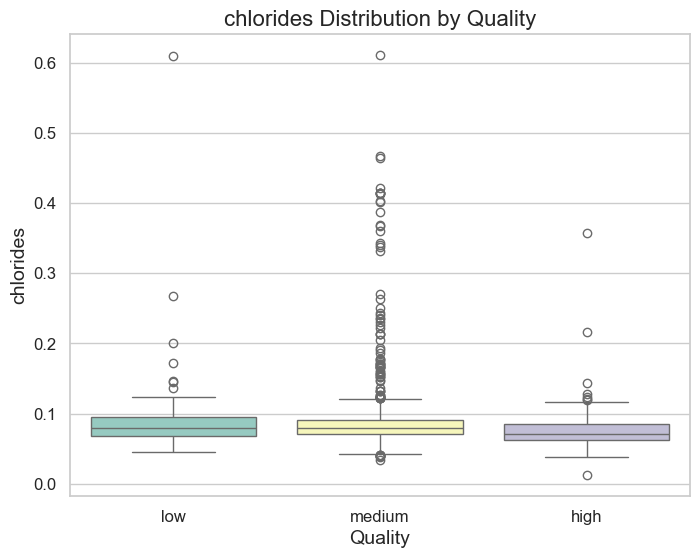

C:\Users\mayuo\AppData\Local\Temp\ipykernel_29092\1311032678.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality', y=col, data=df, palette="Set3")


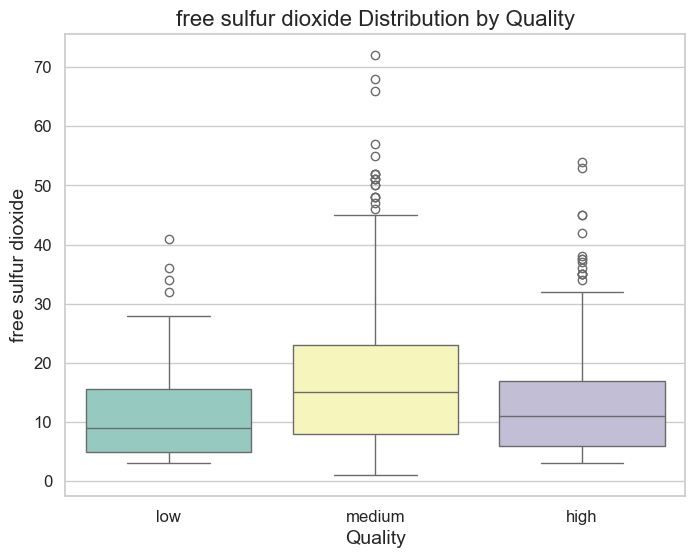

C:\Users\mayuo\AppData\Local\Temp\ipykernel_29092\1311032678.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality', y=col, data=df, palette="Set3")


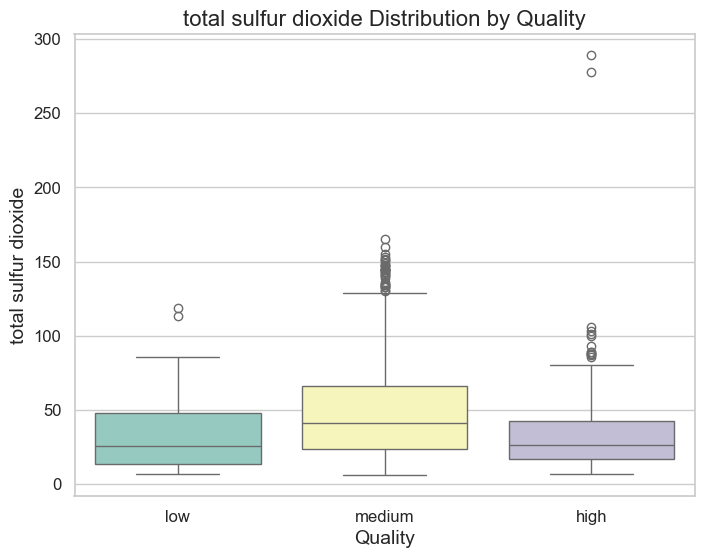

C:\Users\mayuo\AppData\Local\Temp\ipykernel_29092\1311032678.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality', y=col, data=df, palette="Set3")


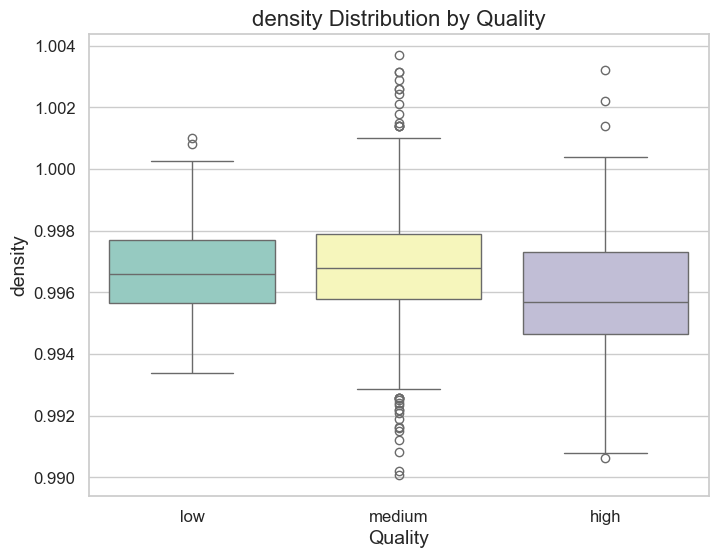

C:\Users\mayuo\AppData\Local\Temp\ipykernel_29092\1311032678.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality', y=col, data=df, palette="Set3")


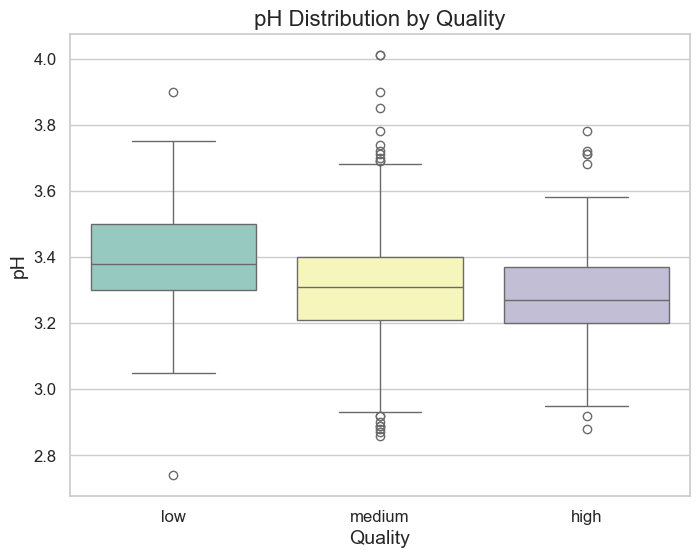

C:\Users\mayuo\AppData\Local\Temp\ipykernel_29092\1311032678.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality', y=col, data=df, palette="Set3")


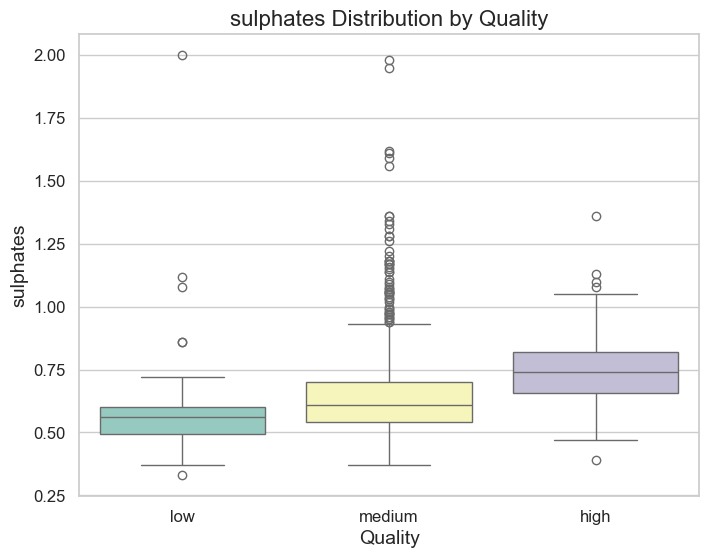

C:\Users\mayuo\AppData\Local\Temp\ipykernel_29092\1311032678.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality', y=col, data=df, palette="Set3")


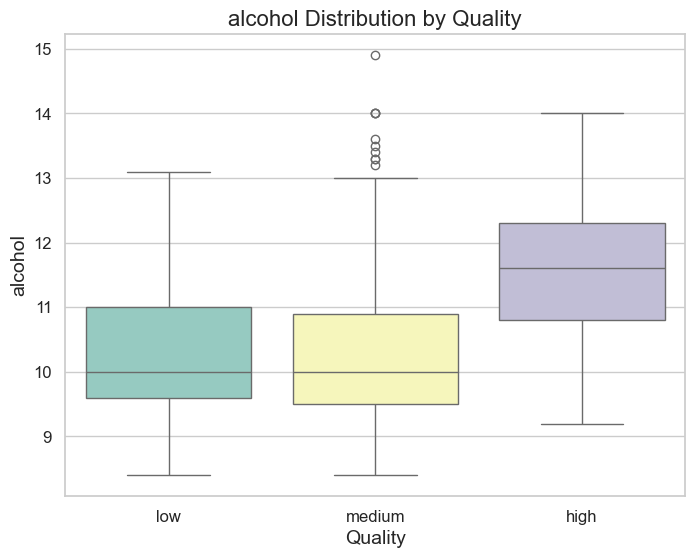

C:\Users\mayuo\AppData\Local\Temp\ipykernel_29092\1311032678.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='quality', y=col, data=df, palette="Set3")


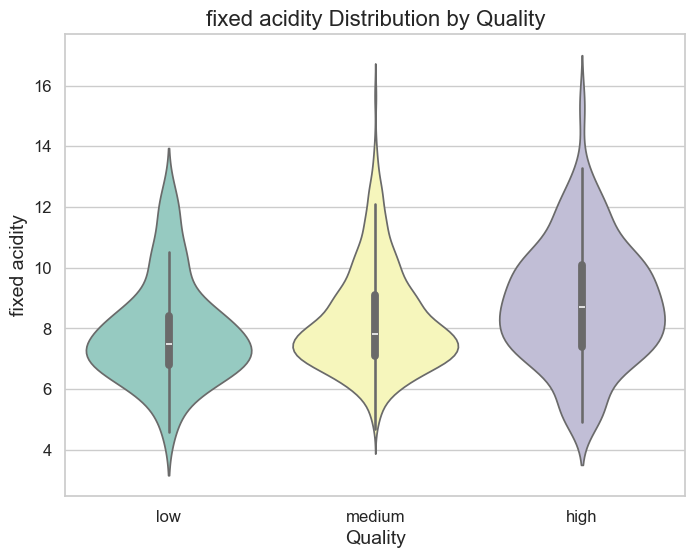

C:\Users\mayuo\AppData\Local\Temp\ipykernel_29092\1311032678.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='quality', y=col, data=df, palette="Set3")


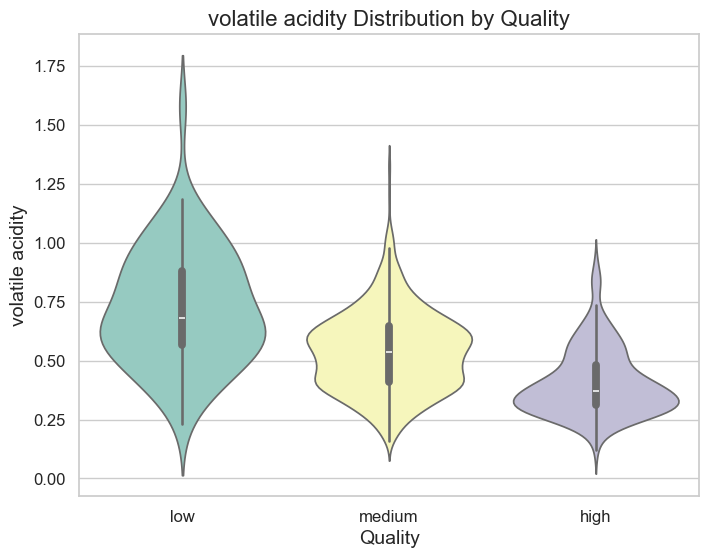

C:\Users\mayuo\AppData\Local\Temp\ipykernel_29092\1311032678.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='quality', y=col, data=df, palette="Set3")


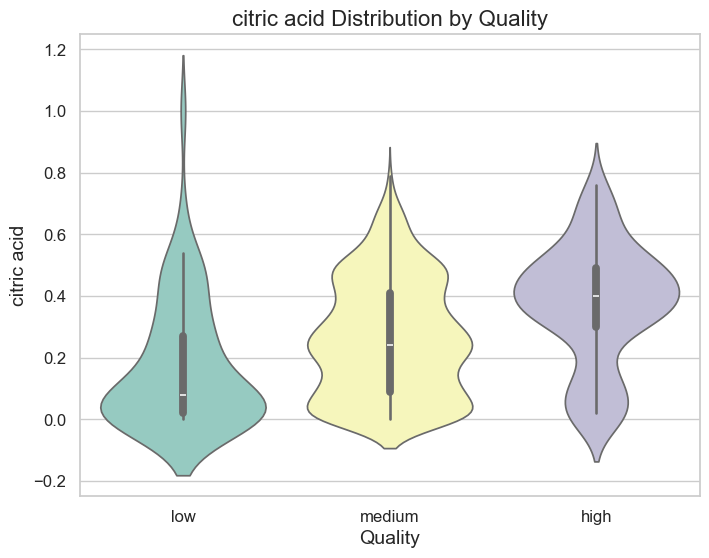

C:\Users\mayuo\AppData\Local\Temp\ipykernel_29092\1311032678.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='quality', y=col, data=df, palette="Set3")


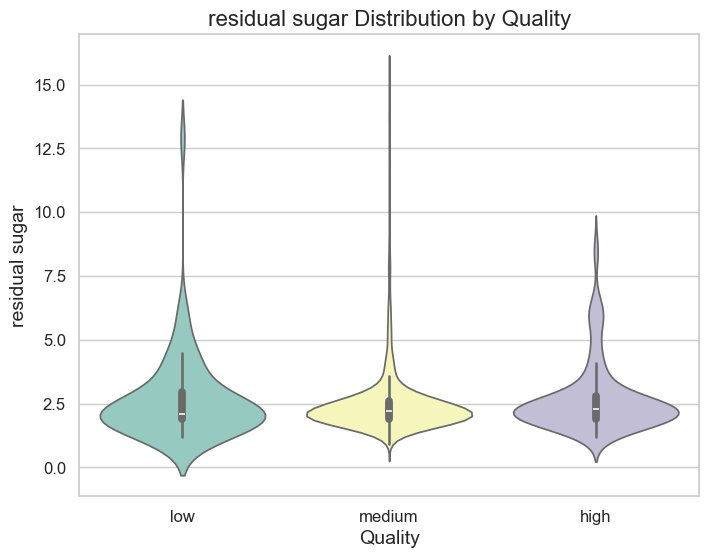

C:\Users\mayuo\AppData\Local\Temp\ipykernel_29092\1311032678.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='quality', y=col, data=df, palette="Set3")


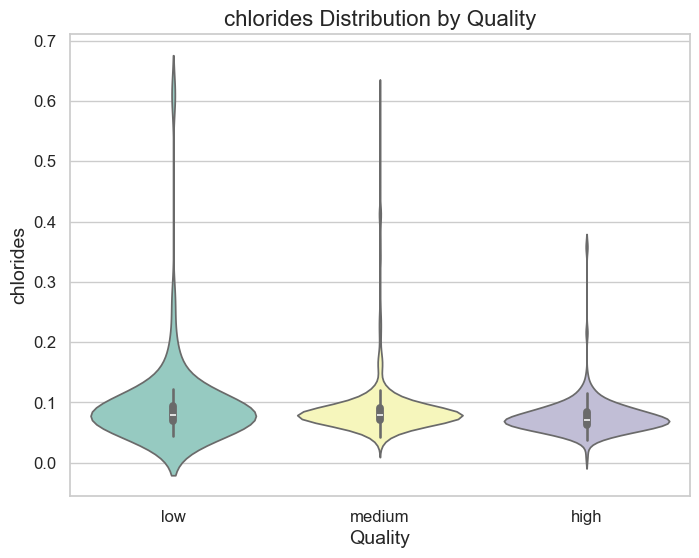

C:\Users\mayuo\AppData\Local\Temp\ipykernel_29092\1311032678.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='quality', y=col, data=df, palette="Set3")


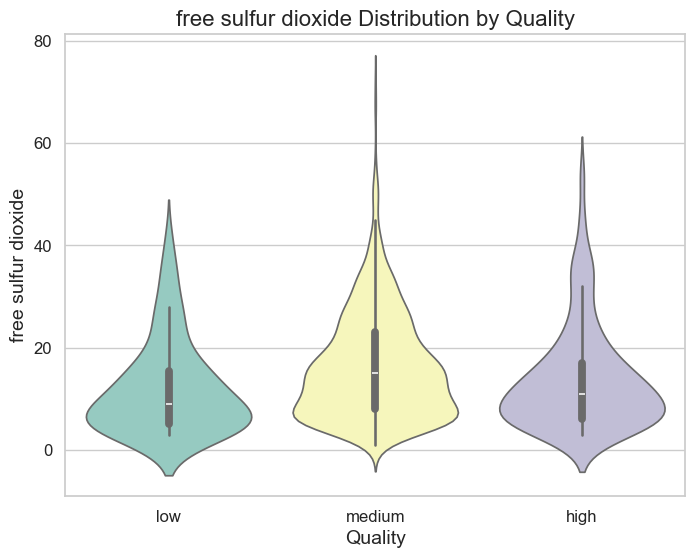

C:\Users\mayuo\AppData\Local\Temp\ipykernel_29092\1311032678.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='quality', y=col, data=df, palette="Set3")


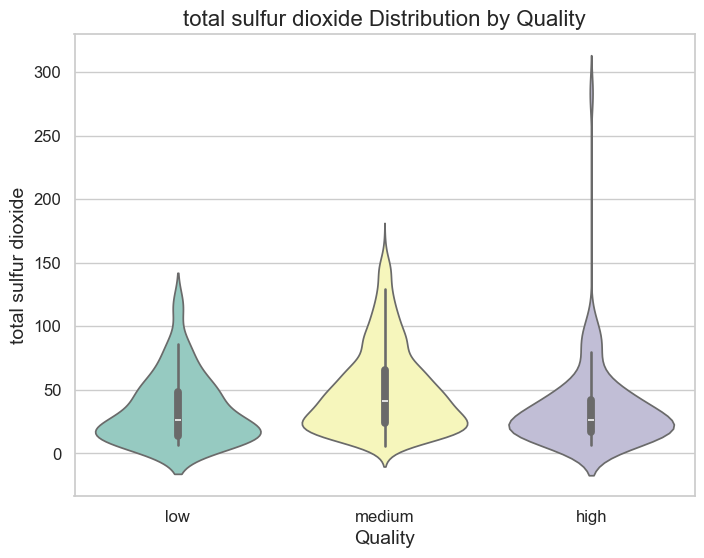

C:\Users\mayuo\AppData\Local\Temp\ipykernel_29092\1311032678.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='quality', y=col, data=df, palette="Set3")


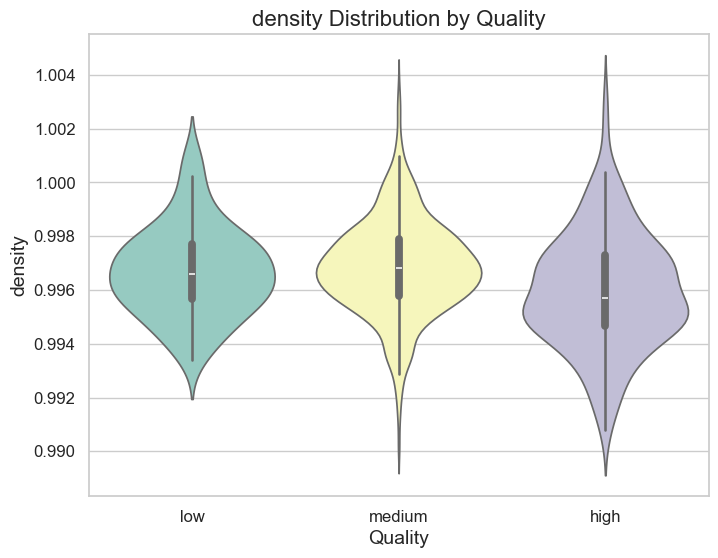

C:\Users\mayuo\AppData\Local\Temp\ipykernel_29092\1311032678.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='quality', y=col, data=df, palette="Set3")


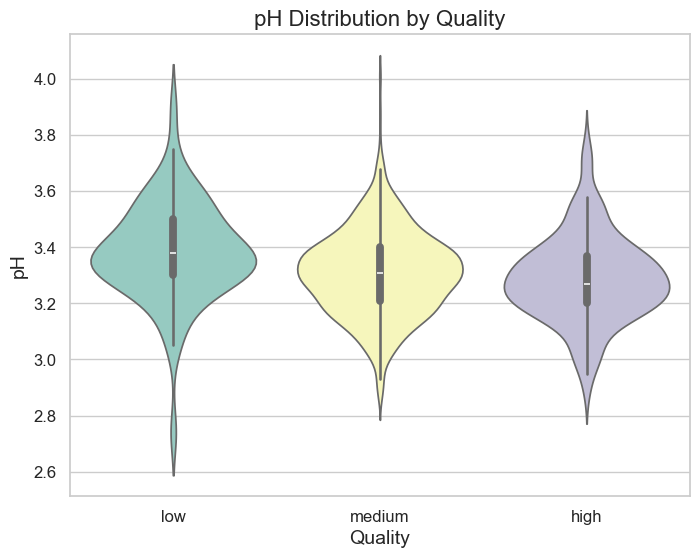

C:\Users\mayuo\AppData\Local\Temp\ipykernel_29092\1311032678.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='quality', y=col, data=df, palette="Set3")


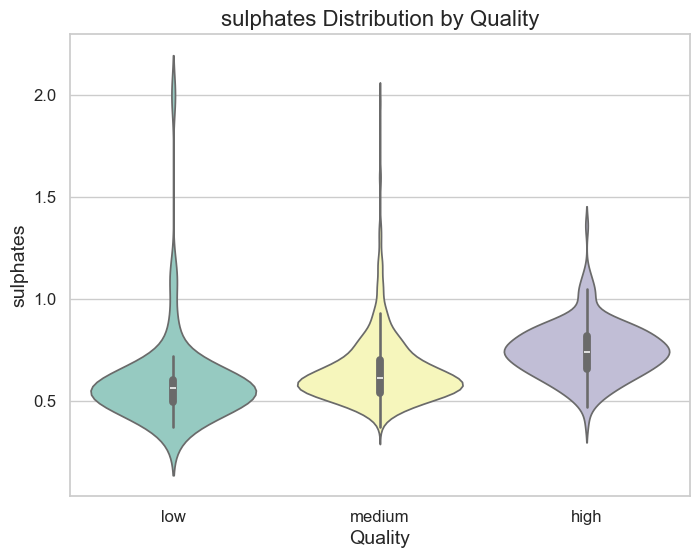

C:\Users\mayuo\AppData\Local\Temp\ipykernel_29092\1311032678.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='quality', y=col, data=df, palette="Set3")


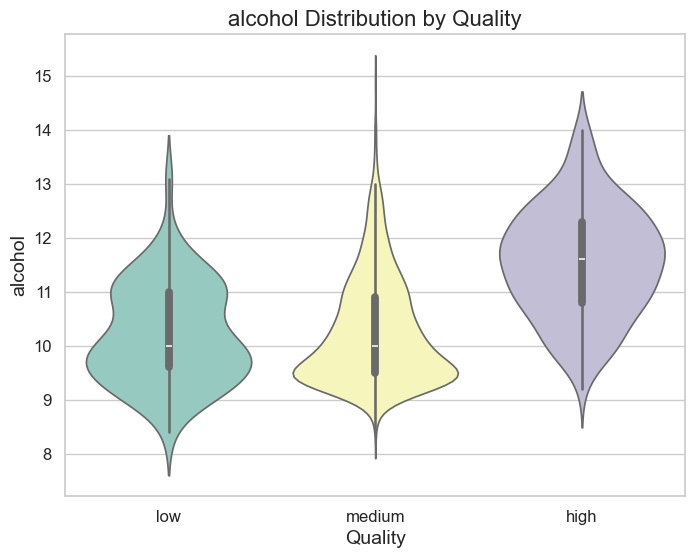

In [34]:
def bivariate_analysis(df):
    """
    This function performs bivariate analysis on a DataFrame.

    Args:
        df (pandas.DataFrame): The DataFrame containing the data.

    Returns:
        None
    """
    # Set style
    sns.set(style="whitegrid")

    # Scatter plots
    sns.pairplot(df.select_dtypes(include=[np.number]), height=2, aspect=1.5)
    plt.suptitle("Pairwise Scatter Plots", fontsize=16)
    plt.show()

    # Correlation matrix heatmap (excluding non-numeric columns)
    numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    corr_matrix = df[numerical_cols].corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Correlation Matrix Heatmap", fontsize=16)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

    # Box plots grouped by 'quality'
    for col in numerical_cols:
        plt.figure(figsize=(8, 6))
        sns.boxplot(x='quality', y=col, data=df, palette="Set3")
        plt.title(f"{col} Distribution by Quality", fontsize=16)
        plt.xlabel("Quality", fontsize=14)
        plt.ylabel(col, fontsize=14)
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.show()

    # Violin plots grouped by 'quality'
    for col in numerical_cols:
        plt.figure(figsize=(8, 6))
        sns.violinplot(x='quality', y=col, data=df, palette="Set3")
        plt.title(f"{col} Distribution by Quality", fontsize=16)
        plt.xlabel("Quality", fontsize=14)
        plt.ylabel(col, fontsize=14)
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.show()

# Example usage:
bivariate_analysis(df_new)

In [35]:
df_new.to_csv("new_df_wine.csv")